**BEYİN TÜMÖRÜ SAPTAMASI**
* Bu projede, beyin tümörü datasetini kullanarak classification(gözetimli) ve clustering(gözetimsiz) öğrenme algoritmaları kullanıldı. Verisetindeki tümör olan ve olmayan görüntüler ortalama, varyans, standat sapma, doku özellikleri gibi farklı özellikler içermektedir

In [1]:
#kütüphaneleri getirme
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

Bu veriseti, teşhiste yardımcı olabilecek 13 farklı feature içermektedir. 

**İlk Derece Özellikler:**
* Mean
* Variance
* Standard Deviation
* Skewness
* Kurtosis

 **İkinci Derece Özellikler:**
* Entropy
* Contrast
* Energy
* ASM 
* Homogeneity
* Dissimilarity
* Correlation
* Coarseness


In [2]:
#dataseti yükleyin ve yazdırın
df = pd.read_csv('/kaggle/input/brain-tumor/Brain Tumor.csv')
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
#istenilen değişkenleri ayırın
X = df.drop(columns=['Image','Class'])
y = df['Class']


**Gözetimli Öğrenme: Lojistik Regresyon**
* Model, beyin tümörünün var olup olmadığını tahmin eder.

In [4]:
#CLASSIFICATION(supervised)
# train ve test datalarını ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


Lojistik regresyon modeli için karışıklık matrisi ve sınıflandırma raporunu grafikleştiriyoruz.

<function matplotlib.pyplot.show(close=None, block=None)>

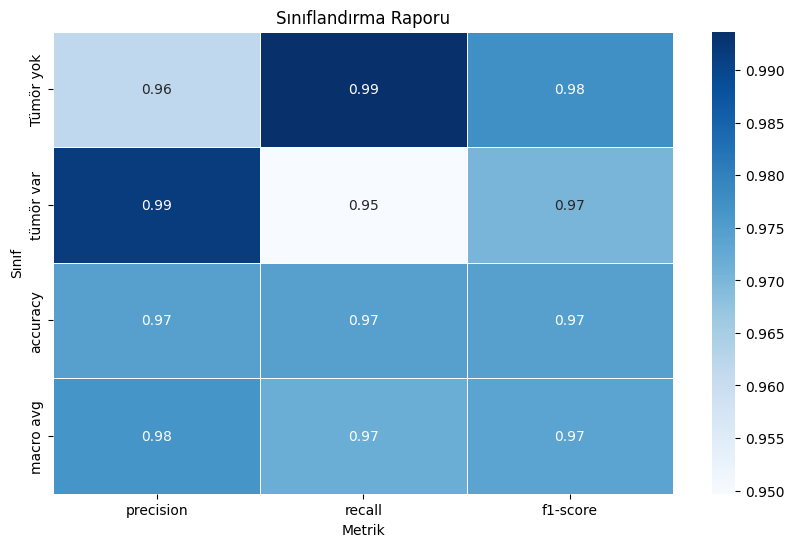

In [5]:
#model oluşturun ve eğitin
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

#test ile tahmin yaptırın
y_pred = log_reg_model.predict(X_test)

#sınıflandırma raporunu hesapla, dataframe'e dönüştür ve grafikleştir
report = classification_report(y_test, y_pred, target_names=['Tümör yok','tümör var'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1,:-1],annot=True, cmap='Blues', fmt='.2f', linewidths=.5 )
plt.xlabel('Metrik')
plt.ylabel('Sınıf')
plt.title('Sınıflandırma Raporu')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

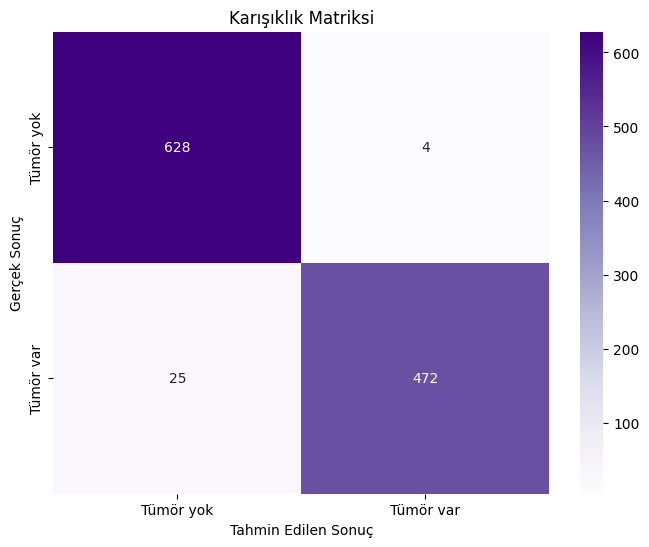

In [6]:
#karışıklık matriksini hesapla ve grafikleştir
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
           xticklabels=['Tümör yok', 'Tümör var'],
           yticklabels=['Tümör yok', 'Tümör var'])
plt.xlabel('Tahmin Edilen Sonuç')
plt.ylabel('Gerçek Sonuç')
plt.title('Karışıklık Matriksi')
plt.show


**Gözetimsiz Öğrenme: KMeans Kümeleme**
* Bu algoritma kullanılarak kümeler ayırt edilir.Tümörlü ve tümörsüz olarak iki küme belirlendi.

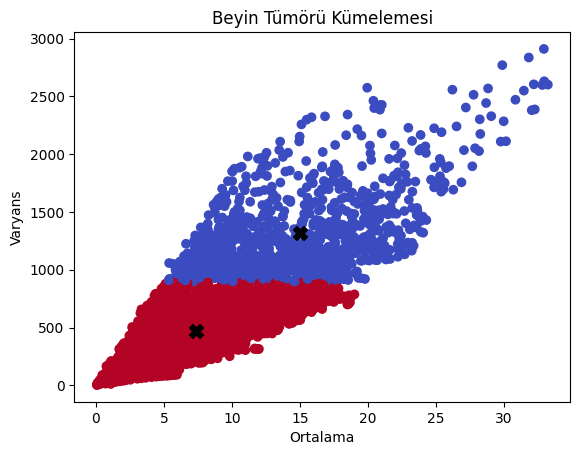

In [7]:
#CLUSTERING(unsupervised)
#2 küme belirleyin(tümör var ya da yok)
kmeans_model = KMeans(n_clusters = 2, random_state = 42, n_init=10)
#modeli eğitin
kmeans_model.fit(X)

#küme etiketlerini alın
cluster_labels = kmeans_model.labels_

#küme merkezlerini alın
cluster_centers = kmeans_model.cluster_centers_

#datapointleri ve küme merkezlerini çizin grafikleştirin
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=cluster_labels, cmap='coolwarm')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c='black', marker='X')
plt.xlabel('Ortalama')
plt.ylabel('Varyans')
plt.title('Beyin Tümörü Kümelemesi')
plt.show()




**Sonuçlar**
* Bu projede gözetimli(sınıflandırma) ve gözetimsiz(kümeleme) öğrenme algoritmaları kullanıldı ve beyin tümörü saptandı. 
* Lojistik regresyon modeli tümörlü ve tümörsüz görüntüleri ayırt etti. Karışıklık matrisi ve sınıflandırma raporunda da görüldüğü gibi doğru tahminler elde ettik.
* KMeans algoritması etiketsiz veriler üzerinde calışarak kümeleri ayırmada başarılı oldu. Görselleştirme ile kümelerin birbirinden ayrıştığını net bir şekilde gözlemledik, ancak doğruluğu gözetimli modeller kadar yüksek değil.
